In [8]:
import numpy as np 
import pandas as pd 
import pandas_datareader as data
import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
df = data.DataReader('^KS11','yahoo', '2000-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,1066.180054,1016.590027,1028.329956,1059.040039,195900.0,1059.040039
2000-01-05,1026.520020,984.049988,1006.869995,986.309998,257700.0,986.309998
2000-01-06,1014.900024,953.500000,1013.950012,960.789978,203500.0,960.789978
2000-01-07,970.159973,930.840027,949.169983,948.650024,215700.0,948.650024
2000-01-10,994.940002,974.820007,979.669983,987.239990,240200.0,987.239990
...,...,...,...,...,...,...
2021-08-30,3164.870117,3132.770020,3160.870117,3144.189941,602900.0,3144.189941
2021-08-31,3199.889893,3130.300049,3144.489990,3199.270020,660500.0,3199.270020
2021-09-01,3215.129883,3185.800049,3195.669922,3207.020020,746700.0,3207.020020


In [10]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-04,1066.180054,1016.590027,1028.329956,1059.040039,195900.0,1059.040039
1,2000-01-05,1026.520020,984.049988,1006.869995,986.309998,257700.0,986.309998
2,2000-01-06,1014.900024,953.500000,1013.950012,960.789978,203500.0,960.789978
3,2000-01-07,970.159973,930.840027,949.169983,948.650024,215700.0,948.650024
4,2000-01-10,994.940002,974.820007,979.669983,987.239990,240200.0,987.239990


In [11]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,1066.180054,1016.590027,1028.329956,1059.040039,195900.0
1,1026.520020,984.049988,1006.869995,986.309998,257700.0
2,1014.900024,953.500000,1013.950012,960.789978,203500.0
3,970.159973,930.840027,949.169983,948.650024,215700.0
4,994.940002,974.820007,979.669983,987.239990,240200.0


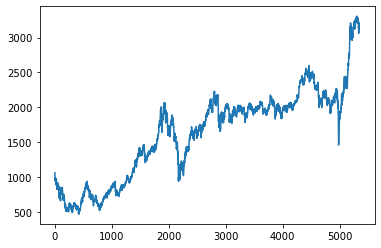

In [12]:
plt.plot(df.Close)

In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5341    3211.727292
5342    3212.287393
5343    3213.038794
5344    3213.441394
5345    3213.761194
Name: Close, Length: 5346, dtype: float64

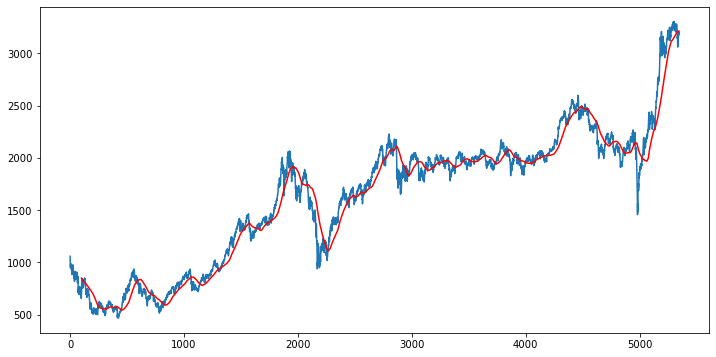

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [15]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5341    3073.245995
5342    3076.812994
5343    3080.469994
5344    3083.879894
5345    3087.170044
Name: Close, Length: 5346, dtype: float64

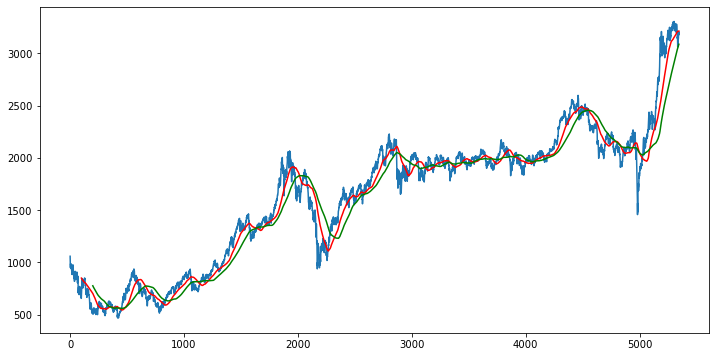

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [17]:
df.shape

(5346, 5)

In [18]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3742, 1)
(1604, 1)


In [19]:
data_training.head()

,Close
0,1059.040039
1,986.309998
2,960.789978
3,948.650024
4,987.239990


In [20]:
data_testing.head()

,Close
3742,1968.390015
3743,1976.119995
3744,1990.469971
3745,1993.079956
3746,1985.800049


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.33534828],
       [0.29402909],
       [0.27953072],
       ...,
       [0.84577891],
       [0.84619362],
       [0.84802294]])

In [23]:
data_training_array.shape

(3742, 1)

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)    

In [28]:
x_train.shape

(3642, 100, 1)

In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 80)           45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100, 80)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

In [51]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
114/114 [==============================] - 15s 105ms/step - loss: 0.0544
Epoch 2/50
114/114 [==============================] - 12s 104ms/step - loss: 0.0103
Epoch 3/50
114/114 [==============================] - 12s 104ms/step - loss: 0.0086
Epoch 4/50
114/114 [==============================] - 12s 104ms/step - loss: 0.0075
Epoch 5/50
114/114 [==============================] - 12s 104ms/step - loss: 0.0068
Epoch 6/50
114/114 [==============================] - 12s 109ms/step - loss: 0.0066
Epoch 7/50
114/114 [==============================] - 12s 109ms/step - loss: 0.0062
Epoch 8/50
114/114 [==============================] - 12s 106ms/step - loss: 0.0060
Epoch 9/50
114/114 [==============================] - 12s 103ms/step - loss: 0.0059
Epoch 10/50
114/114 [==============================] - 12s 104ms/step - loss: 0.0054
Epoch 11/50
114/114 [==============================] - 12s 103ms/step - loss: 0.0049
Epoch 12/50
114/114 [==============================] - 12s 107ms/step - lo

In [52]:
model.save('keras_model.h5')

In [53]:
data_testing.head()

,Close
3742,1968.390015
3743,1976.119995
3744,1990.469971
3745,1993.079956
3746,1985.800049


In [54]:
data_testing.tail(100)

,Close
5246,3182.379883
5247,3194.330078
5248,3198.620117
5249,3198.840088
5250,3220.699951
...,...
5341,3144.189941
5342,3199.270020
5343,3207.020020
5344,3175.850098


In [55]:
past_100_days = data_training.tail(100)

In [56]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [57]:
final_df.head

<bound method NDFrame.head of             Close
0     2035.640015
1     2034.109985
2     2031.640015
3     2026.599976
4     2020.089966
...           ...
1699  3144.189941
1700  3199.270020
1701  3207.020020
1702  3175.850098
1703  3201.060059

[1704 rows x 1 columns]>

In [58]:
input_data = scaler.fit_transform(final_df)

In [59]:
input_data.shape

(1704, 1)

In [60]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [61]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1604, 100, 1)
(1604,)


In [62]:
y_predicted = model.predict(x_test)

In [63]:
y_predicted.shape

(1604, 1)

In [64]:
y_test

array([0.2764442 , 0.28062807, 0.28839501, ..., 0.94685455, 0.92998378,
       0.94362871])

In [65]:
y_predicted

array([[0.34179726],
       [0.34239316],
       [0.3436028 ],
       ...,
       [0.84938526],
       [0.8546208 ],
       [0.8600677 ]], dtype=float32)

In [66]:
scaler.scale_

array([0.00054125])

In [67]:
scale_factor = 1/0.00054125
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

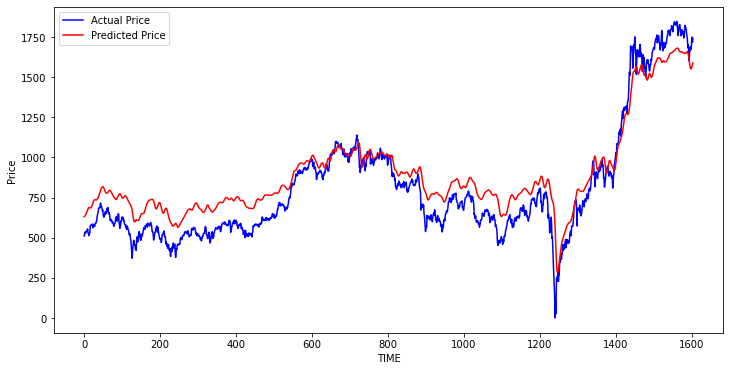

In [68]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Actual Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('TIME')
plt.ylabel('Price')
plt.legend()
plt.show()